In [167]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

import numpy as np
import geopandas as gpd
import pycountry
from pycountry_convert import country_name_to_country_alpha2, country_alpha2_to_continent_code, convert_continent_code_to_continent_name

import statsmodels.api as sm
import statsmodels.formula.api as smf


## LOAD DATA SET

In [168]:
streaming_viewership_data = pd.read_csv('../data/imdb_top_1000.csv')

In [169]:
streaming_viewership_data.describe()
streaming_viewership_data.head()


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.30,Two imprisoned men bond over a number of years...,80.00,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.20,An organized crime dynasty's aging patriarch t...,100.00,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.00,When the menace known as the Joker wreaks havo...,84.00,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.00,The early life and career of Vito Corleone in ...,90.00,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.00,A jury holdout attempts to prevent a miscarria...,96.00,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


# Check and Drop NA values 

In [170]:
isnull_check = streaming_viewership_data.isnull().sum()
isnull_check

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [171]:
streaming_viewership_data[streaming_viewership_data['Gross'].isna() == True]

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
18,https://m.media-amazon.com/images/M/MV5BNjViNW...,Hamilton,2020,PG-13,160 min,"Biography, Drama, History",8.60,The real life of one of America's foremost fou...,90.00,Thomas Kail,Lin-Manuel Miranda,Phillipa Soo,Leslie Odom Jr.,Renée Elise Goldsberry,55291,NaN
20,https://m.media-amazon.com/images/M/MV5BOTc2ZT...,Soorarai Pottru,2020,U,153 min,Drama,8.60,"Nedumaaran Rajangam ""Maara"" sets out to make t...",NaN,Sudha Kongara,Suriya,Madhavan,Paresh Rawal,Aparna Balamurali,54995,NaN
30,https://m.media-amazon.com/images/M/MV5BYjBmYT...,Seppuku,1962,NaN,133 min,"Action, Drama, Mystery",8.60,When a ronin requesting seppuku at a feudal lo...,85.00,Masaki Kobayashi,Tatsuya Nakadai,Akira Ishihama,Shima Iwashita,Tetsurô Tanba,42004,NaN
32,https://m.media-amazon.com/images/M/MV5BZjc4ND...,It's a Wonderful Life,1946,PG,130 min,"Drama, Family, Fantasy",8.60,An angel is sent from Heaven to help a despera...,89.00,Frank Capra,James Stewart,Donna Reed,Lionel Barrymore,Thomas Mitchell,405801,NaN
46,https://m.media-amazon.com/images/M/MV5BZmY2Nj...,Hotaru no haka,1988,U,89 min,"Animation, Drama, War",8.50,A young boy and his little sister struggle to ...,94.00,Isao Takahata,Tsutomu Tatsumi,Ayano Shiraishi,Akemi Yamaguchi,Yoshiko Shinohara,235231,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,https://m.media-amazon.com/images/M/MV5BYTE4YW...,Blowup,1966,A,111 min,"Drama, Mystery, Thriller",7.60,A fashion photographer unknowingly captures a ...,82.00,Michelangelo Antonioni,David Hemmings,Vanessa Redgrave,Sarah Miles,John Castle,56513,NaN
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.60,A young New York socialite becomes interested ...,76.00,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.60,Sprawling epic covering the life of a Texas ca...,84.00,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.60,Several survivors of a torpedoed merchant ship...,78.00,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


##  dropping na values
since this dataset wants to focus on the impact genre has on revenue, therefore rows without reported reveune will be dropped. The Certificate and Meta score columns will also be dropped since these values are not being used in this column. 

In [172]:
streaming_viewership_data = streaming_viewership_data.drop(['Meta_score','Certificate'],axis=1)

In [173]:
streaming_viewership_data.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [174]:
streaming_viewership_data = streaming_viewership_data.dropna(subset='Gross')

In [175]:

streaming_viewership_data[streaming_viewership_data['Gross'].isna() == True]
streaming_viewership_data.isnull().sum()

Poster_Link      0
Series_Title     0
Released_Year    0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

## Na Values are filled, next clean genre column

In [176]:
unique_genres = set(genre for genres in streaming_viewership_data['Genre'].str.split(', ') for genre in genres)
unique_genres = list(unique_genres)
unique_genres

['Action',
 'Music',
 'Biography',
 'Thriller',
 'Family',
 'Drama',
 'Western',
 'Fantasy',
 'Sci-Fi',
 'Film-Noir',
 'Adventure',
 'Musical',
 'Mystery',
 'Romance',
 'Sport',
 'Crime',
 'Horror',
 'History',
 'Comedy',
 'War',
 'Animation']

In [177]:
streaming_viewership_data['Genre'] = streaming_viewership_data['Genre'].str.split(', ')

In [178]:
streaming_viewership_data_PRE_EXPODED = streaming_viewership_data

In [179]:
streaming_viewership_data = streaming_viewership_data.explode('Genre')
streaming_viewership_data.head()

,Poster_Link,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Overview,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,142 min,Drama,9.30,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,175 min,Crime,9.20,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,175 min,Drama,9.20,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,152 min,Action,9.00,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,152 min,Crime,9.00,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"


In [180]:
streaming_viewership_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2109 entries, 0 to 997
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    2109 non-null   object 
 1   Series_Title   2109 non-null   object 
 2   Released_Year  2109 non-null   object 
 3   Runtime        2109 non-null   object 
 4   Genre          2109 non-null   object 
 5   IMDB_Rating    2109 non-null   float64
 6   Overview       2109 non-null   object 
 7   Director       2109 non-null   object 
 8   Star1          2109 non-null   object 
 9   Star2          2109 non-null   object 
 10  Star3          2109 non-null   object 
 11  Star4          2109 non-null   object 
 12  No_of_Votes    2109 non-null   int64  
 13  Gross          2109 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 247.1+ KB


In [181]:
streaming_viewership_data['Gross'] = streaming_viewership_data['Gross'].str.replace(',', '').astype(float)
streaming_viewership_data['Released_Year'] =  pd.to_numeric(streaming_viewership_data['Released_Year'], errors='coerce')

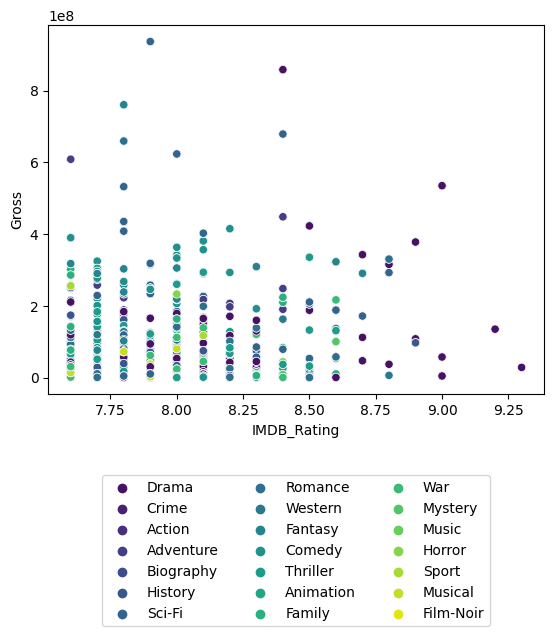

In [182]:
ax2 = sns.scatterplot(x='IMDB_Rating',
                      y='Gross',
                      hue='Genre',
                      data=streaming_viewership_data,
                      palette='viridis')
ax2.legend(bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=3)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Adventure'),
  Text(2, 0, 'Animation'),
  Text(3, 0, 'Biography'),
  Text(4, 0, 'Comedy'),
  Text(5, 0, 'Crime'),
  Text(6, 0, 'Drama'),
  Text(7, 0, 'Family'),
  Text(8, 0, 'Fantasy'),
  Text(9, 0, 'Film-Noir'),
  Text(10, 0, 'History'),
  Text(11, 0, 'Horror'),
  Text(12, 0, 'Music'),
  Text(13, 0, 'Musical'),
  Text(14, 0, 'Mystery'),
  Text(15, 0, 'Romance'),
  Text(16, 0, 'Sci-Fi'),
  Text(17, 0, 'Sport'),
  Text(18, 0, 'Thriller'),
  Text(19, 0, 'War'),
  Text(20, 0, 'Western')])

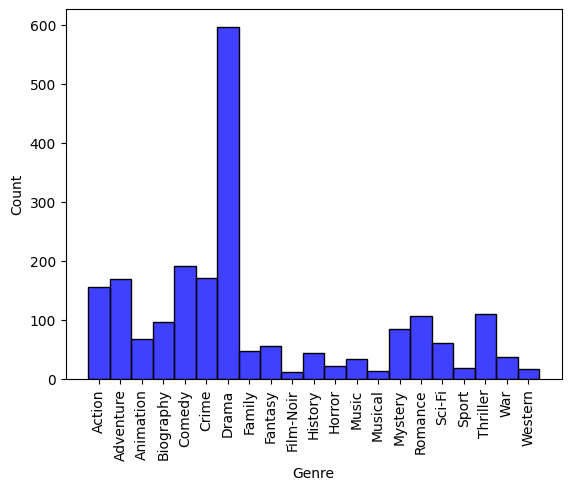

In [183]:
movies_by_Genre = streaming_viewership_data.sort_values(by='Genre')
sns.histplot(data=movies_by_Genre, x='Genre', color='blue')
plt.xticks(rotation=90)


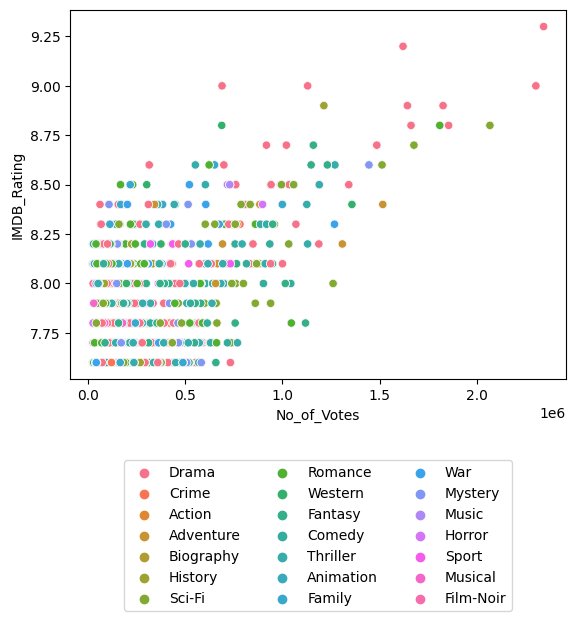

In [184]:
sns.scatterplot(data=streaming_viewership_data, x='No_of_Votes', y='IMDB_Rating', hue='Genre')
plt.legend(bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=3)

In [185]:
streaming_viewership_data_PRE_EXPODED['Genre']

0                             [Drama]
1                      [Crime, Drama]
2              [Action, Crime, Drama]
3                      [Crime, Drama]
4                      [Crime, Drama]
                    ...              
990             [Drama, War, Western]
991          [Adventure, Comedy, War]
992    [Animation, Adventure, Family]
994          [Comedy, Music, Musical]
997             [Drama, Romance, War]
Name: Genre, Length: 831, dtype: object

In [186]:
def many_or_one(row):
    x = len(row['Genre'])
    return x 

def more_than_one(row):
    if len(row['Genre']) > 1:
        return 'multi genre'
    elif len(row['Genre']) == 1:
        return 'one genre'

streaming_viewership_data_PRE_EXPODED['Genre_Count'] = streaming_viewership_data_PRE_EXPODED.apply(many_or_one, axis=1)
streaming_viewership_data_PRE_EXPODED['Genre_Singular'] = streaming_viewership_data_PRE_EXPODED.apply(more_than_one, axis=1)
# streaming_viewership_data_PRE_EXPODED['Genre_Singular'] = streaming_viewership_data_PRE_EXPODED['Genre_Singular'].astype('category')

In [187]:
streaming_viewership_data_PRE_EXPODED.info()

<class 'pandas.core.frame.DataFrame'>
Index: 831 entries, 0 to 997
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Poster_Link     831 non-null    object 
 1   Series_Title    831 non-null    object 
 2   Released_Year   831 non-null    object 
 3   Runtime         831 non-null    object 
 4   Genre           831 non-null    object 
 5   IMDB_Rating     831 non-null    float64
 6   Overview        831 non-null    object 
 7   Director        831 non-null    object 
 8   Star1           831 non-null    object 
 9   Star2           831 non-null    object 
 10  Star3           831 non-null    object 
 11  Star4           831 non-null    object 
 12  No_of_Votes     831 non-null    int64  
 13  Gross           831 non-null    object 
 14  Genre_Count     831 non-null    int64  
 15  Genre_Singular  831 non-null    object 
dtypes: float64(1), int64(2), object(13)
memory usage: 110.4+ KB


Text(0.5, 1.0, 'Value Counts of Genre_Count')

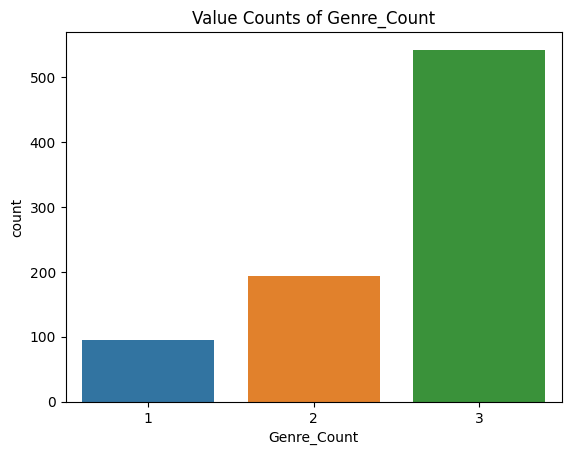

In [188]:
# streaming_viewership_data_PRE_EXPODED['Genre_Count']

sns.countplot(x='Genre_Count', data=streaming_viewership_data_PRE_EXPODED)
plt.title('Value Counts of Genre_Count')

## EDA ON DIFFERENT GENRE

In [210]:
total_data_per_genre = streaming_viewership_data.groupby('Genre').agg({
    'Gross': 'sum',
    'No_of_Votes': 'sum',
    'IMDB_Rating': 'mean'
    }).reset_index()
total_data_per_genre

,Genre,Gross,No_of_Votes,IMDB_Rating
0,Action,22033328131.00,74333889,7.95
1,Adventure,28174317369.00,81507170,7.96
2,Animation,8573824407.00,20630006,7.92
3,Biography,5304577796.00,26259964,7.92
4,Comedy,12247931579.00,49827843,7.90
5,Crime,6956303927.00,56302319,7.96
6,Drama,27497622629.00,165108019,7.95
7,Family,4460767532.00,11554412,7.89
8,Fantasy,6082543147.00,21839838,7.91
9,Film-Noir,53592803.00,1033880,8.01


In [211]:
most_votes = total_data_per_genre.loc[total_data_per_genre['No_of_Votes'].idxmax()]
most_votes

Genre                  Drama
Gross         27497622629.00
No_of_Votes        165108019
IMDB_Rating             7.95
Name: 6, dtype: object

In [212]:
least_votes = total_data_per_genre.loc[total_data_per_genre['No_of_Votes'].idxmin()]
least_votes

Genre           Film-Noir
Gross         53592803.00
No_of_Votes       1033880
IMDB_Rating          8.01
Name: 9, dtype: object

In [213]:
highest_gross = total_data_per_genre.loc[total_data_per_genre['Gross'].idxmax()]
highest_gross

Genre              Adventure
Gross         28174317369.00
No_of_Votes         81507170
IMDB_Rating             7.96
Name: 1, dtype: object

In [214]:
lowest_gross = total_data_per_genre.loc[total_data_per_genre['Gross'].idxmin()]
lowest_gross

Genre           Film-Noir
Gross         53592803.00
No_of_Votes       1033880
IMDB_Rating          8.01
Name: 9, dtype: object

In [215]:
highest_IMDB = total_data_per_genre.loc[total_data_per_genre['IMDB_Rating'].idxmax()]
highest_IMDB

Genre              Western
Gross         856301404.00
No_of_Votes        4362677
IMDB_Rating           8.04
Name: 20, dtype: object

In [216]:
lowest_IMDB = total_data_per_genre.loc[total_data_per_genre['IMDB_Rating'].idxmin()]
lowest_IMDB

Genre               Horror
Gross         880051903.00
No_of_Votes        6310485
IMDB_Rating           7.88
Name: 11, dtype: object

/var/folders/d4/j7c9j9fs6dbfk8m9_rsd3s1c0000gn/T/ipykernel_53611/3455502473.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(total_data_per_genre['Genre'], rotation=90)


Text(0.5, 1.0, 'Gross Revenue by Genre and Mean Number of Votes per Genre')

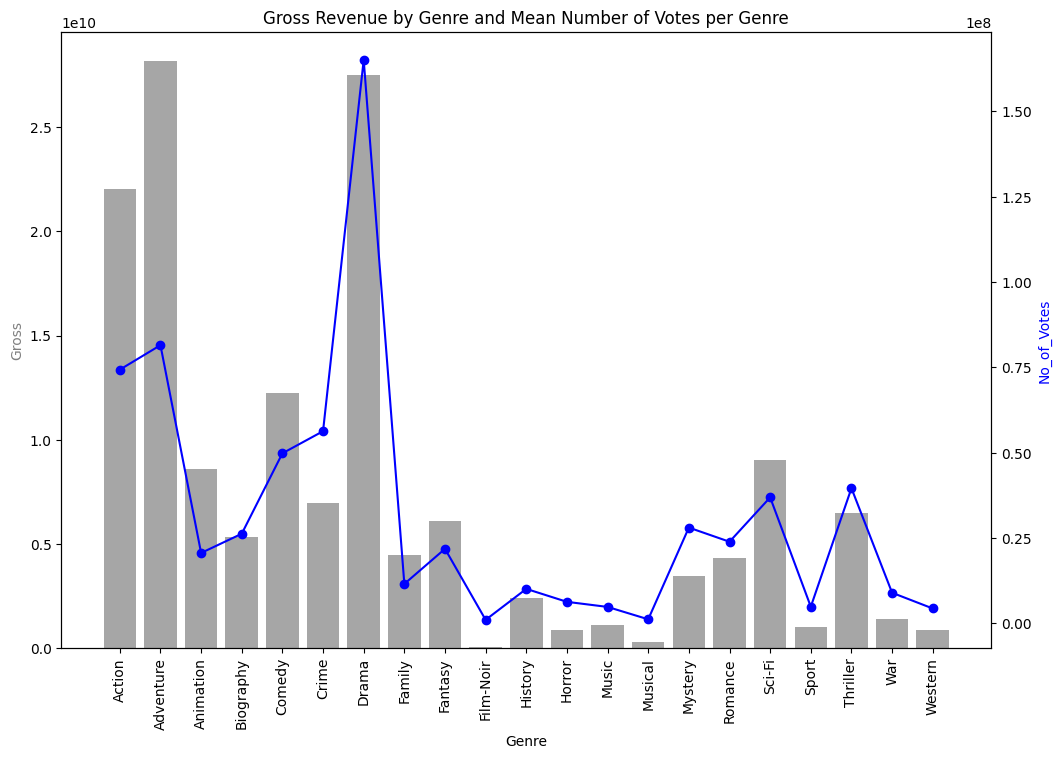

In [219]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.bar(total_data_per_genre['Genre'], total_data_per_genre['Gross'], color='grey', alpha=0.7, label='Gross')
ax2 = ax1.twinx()
ax2.plot(total_data_per_genre['Genre'], total_data_per_genre['No_of_Votes'], color='blue', marker='o', label='No_of_Votes')
ax1.set_xlabel('Genre')
ax1.set_xticklabels(total_data_per_genre['Genre'], rotation=90)
ax1.set_ylabel('Gross', color='grey')
ax2.set_ylabel('No_of_Votes', color='blue')
plt.title('Gross Revenue by Genre and Mean Number of Votes per Genre')

/var/folders/d4/j7c9j9fs6dbfk8m9_rsd3s1c0000gn/T/ipykernel_53611/2753216183.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(total_data_per_genre['Genre'], rotation=90)


Text(0.5, 1.0, 'Gross Revenue by Genre and Mean IMDB rating per Genre')

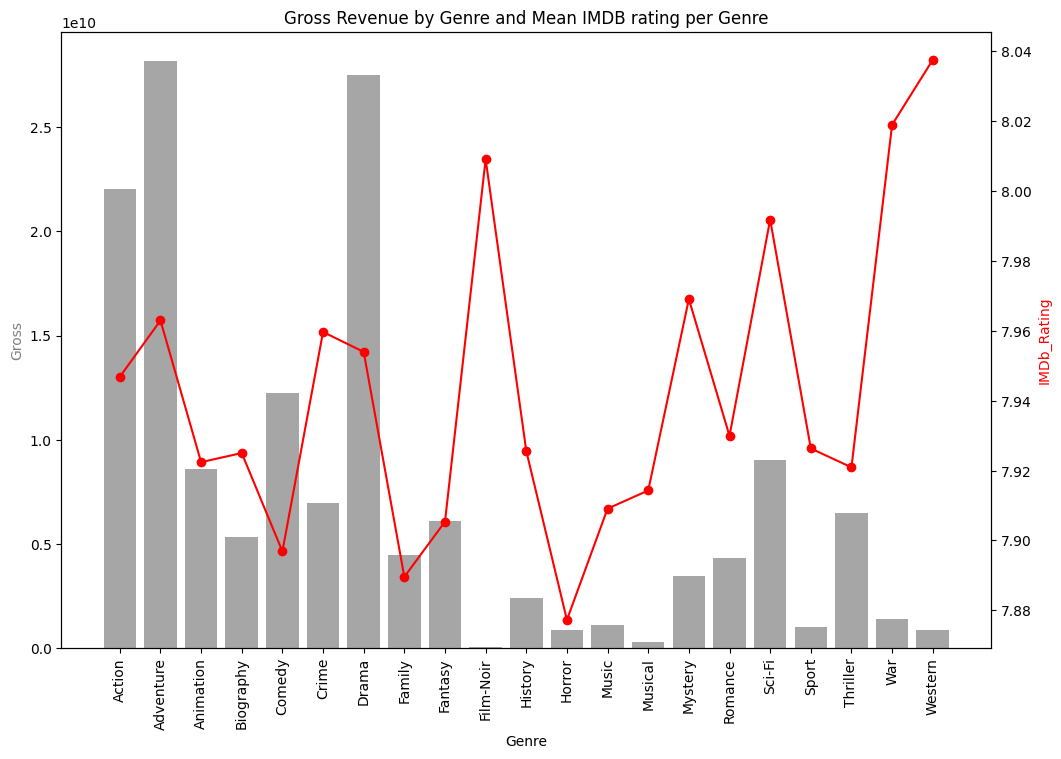

In [220]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.bar(total_data_per_genre['Genre'], total_data_per_genre['Gross'], color='grey', alpha=0.7, label='Gross')
ax2 = ax1.twinx()
ax2.plot(total_data_per_genre['Genre'], total_data_per_genre['IMDB_Rating'], color='red', marker='o', label='IMDB_Rating')

ax1.set_xlabel('Genre')
ax1.set_xticklabels(total_data_per_genre['Genre'], rotation=90)
ax1.set_ylabel('Gross', color='grey')
ax2.set_ylabel('IMDb_Rating', color='red')
plt.title('Gross Revenue by Genre and Mean IMDB rating per Genre')

## HEATMAP

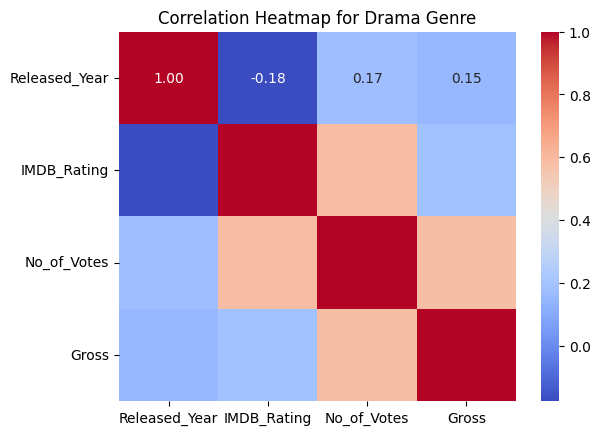

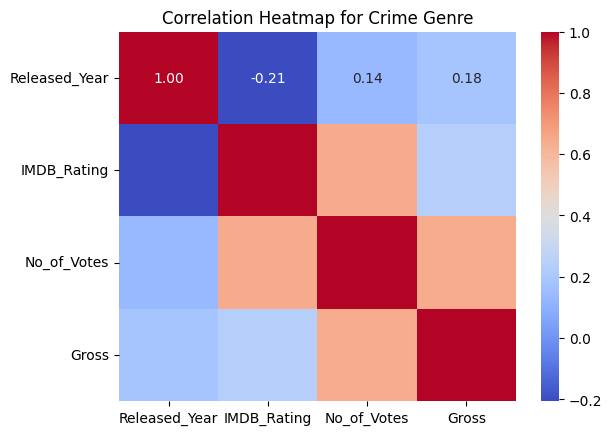

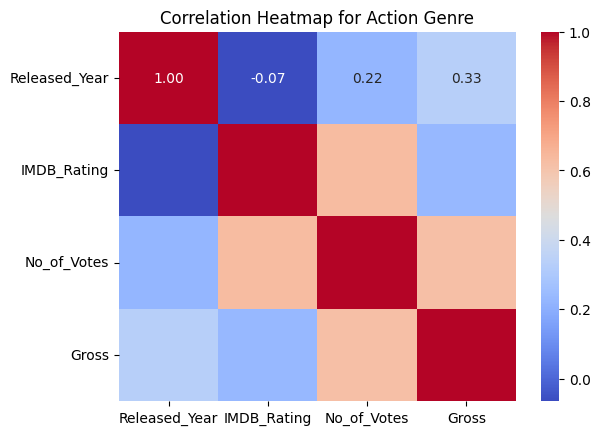

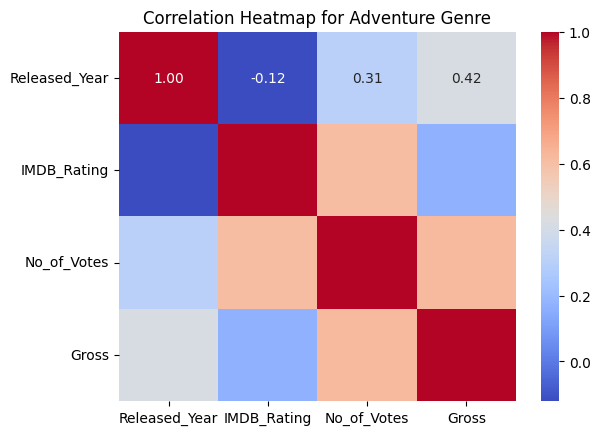

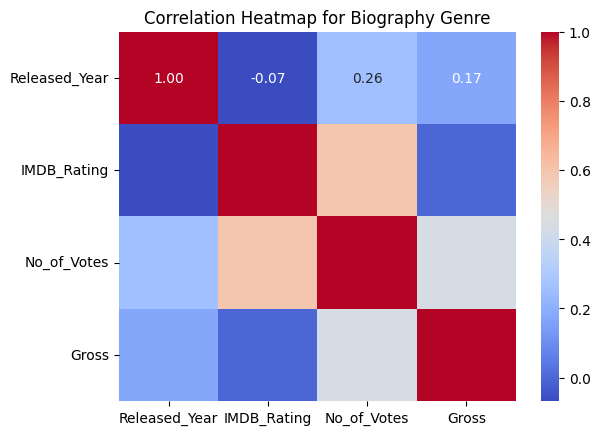

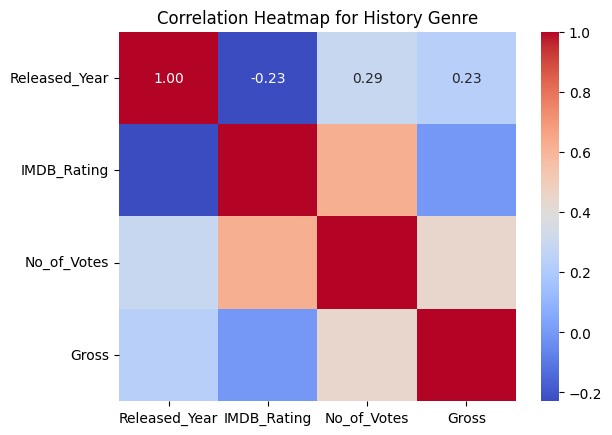

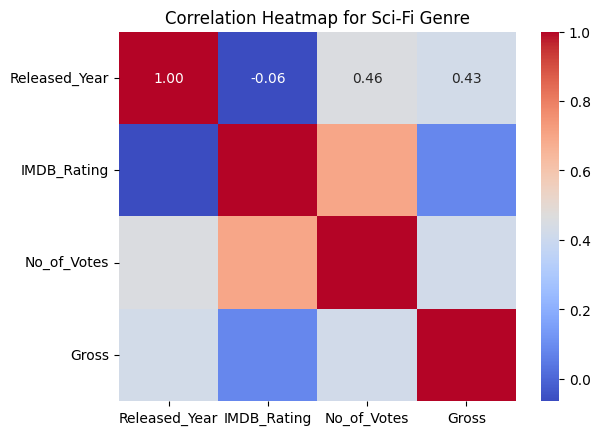

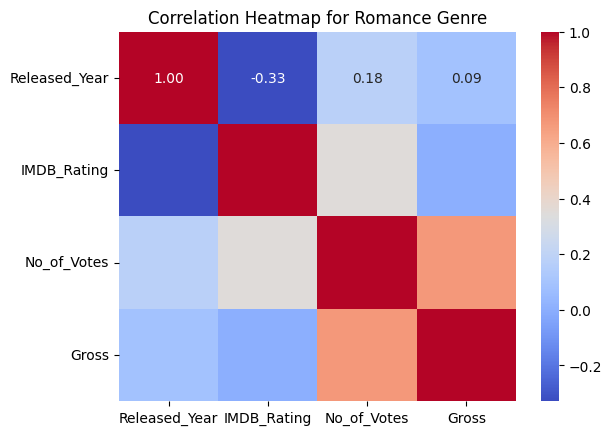

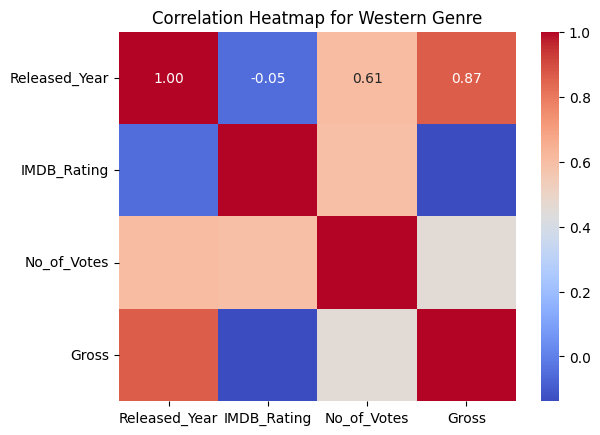

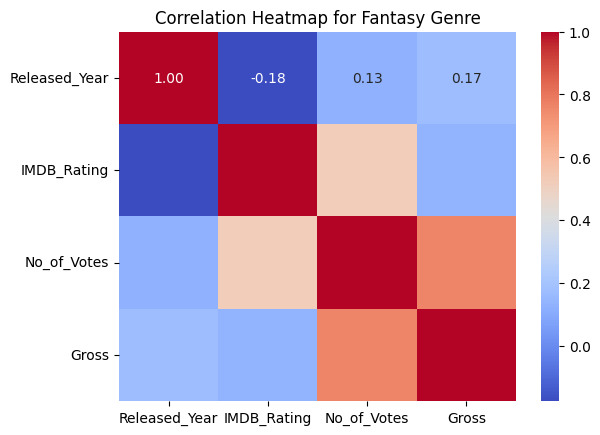

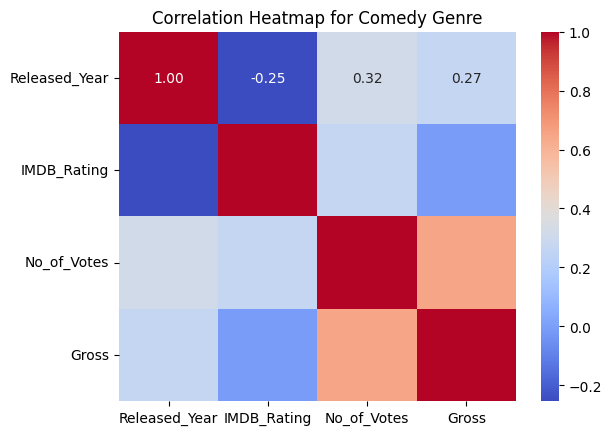

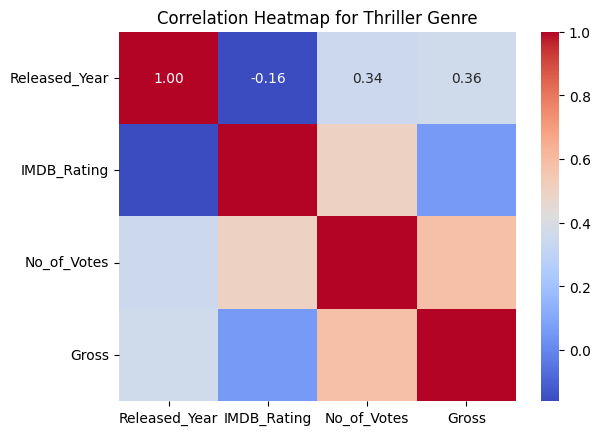

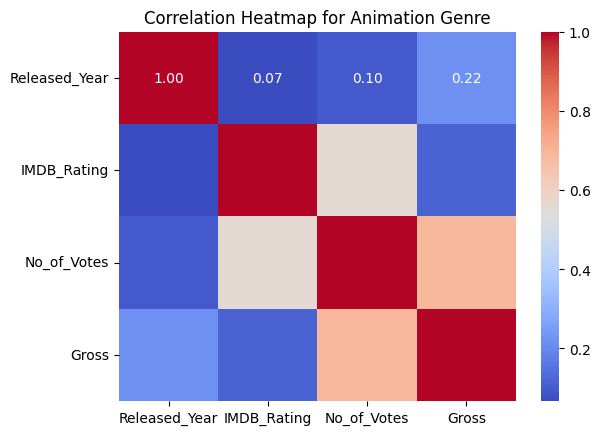

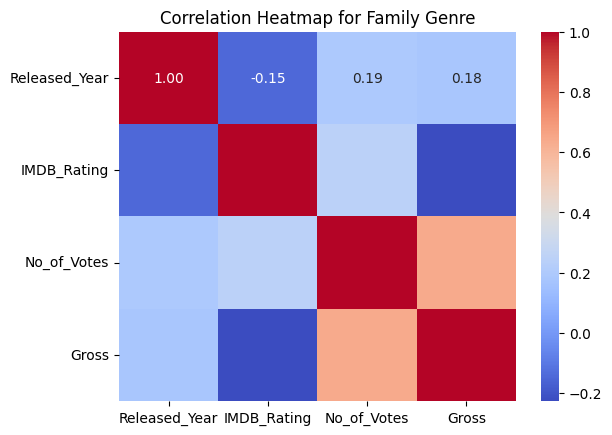

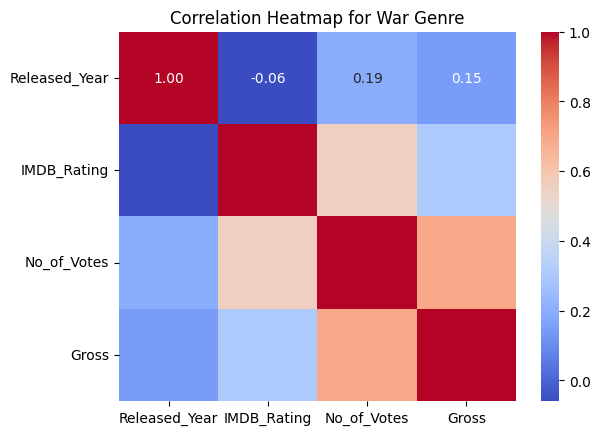

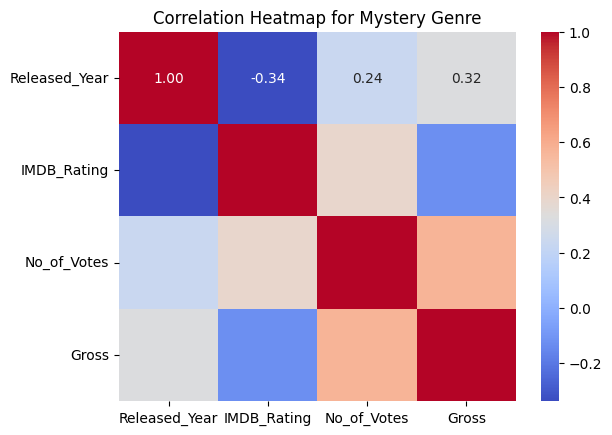

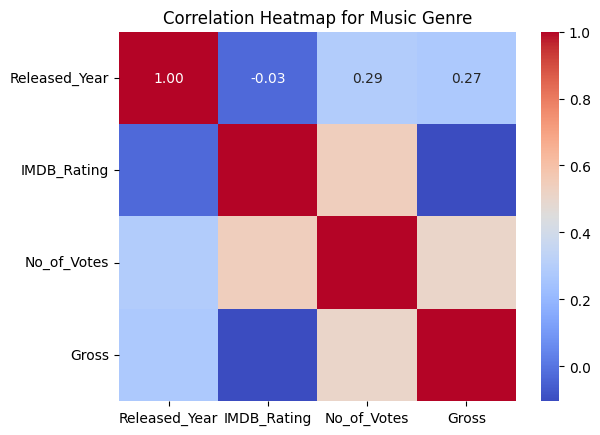

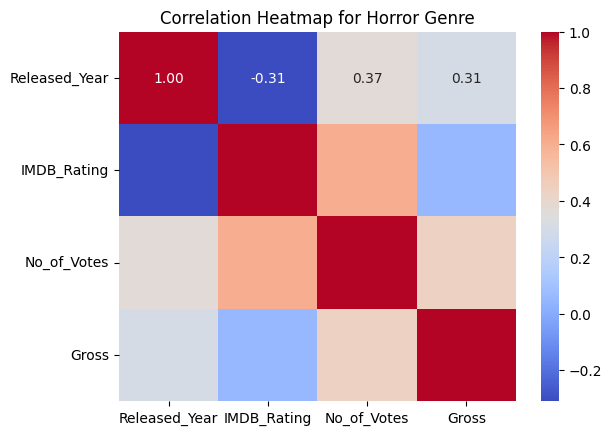

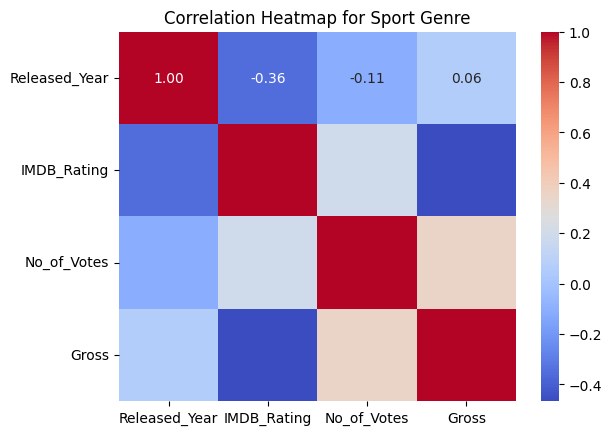

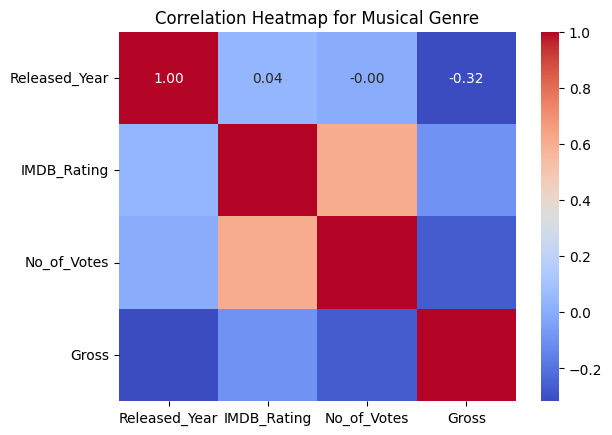

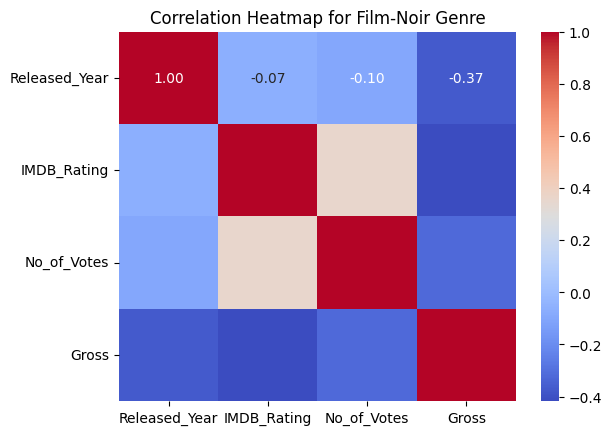

In [189]:
unique_genres = streaming_viewership_data['Genre'].unique()
variable_columns = ['Released_Year', 'IMDB_Rating', 'No_of_Votes', 'Gross']


for genre in unique_genres:
    genre_data = streaming_viewership_data[streaming_viewership_data['Genre'] == genre]
    heatmap_data = genre_data[variable_columns].astype(float)
    
    sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'Correlation Heatmap for {genre} Genre')
    plt.show()

In [193]:
selected_variables = ['Released_Year', 'IMDB_Rating', 'No_of_Votes', 'Gross']


unique_genres = streaming_viewership_data['Genre'].unique()
print(unique_genres)
variable_columns = ['Released_Year', 'IMDB_Rating', 'No_of_Votes', 'Gross']


for genre in unique_genres:
    genre_data = streaming_viewership_data[streaming_viewership_data['Genre'] == genre]
    genre_data = genre_data[selected_variables].astype(float)
    output = genre_data.corr().unstack().sort_values(ascending=False).reset_index()
    output.columns = ['var1', 'var2', 'corr']
    output.drop_duplicates('corr', inplace=True)
    output = output[output.apply(lambda x: x.var1 != x.var2, axis=1)]
    print(f'Correlation for {genre} genre:')
    print(output)
    print()


['Drama' 'Crime' 'Action' 'Adventure' 'Biography' 'History' 'Sci-Fi'
 'Romance' 'Western' 'Fantasy' 'Comedy' 'Thriller' 'Animation' 'Family'
 'War' 'Mystery' 'Music' 'Horror' 'Sport' 'Musical' 'Film-Noir']
Correlation for Drama genre:
             var1         var2  corr
4     IMDB_Rating  No_of_Votes  0.59
6     No_of_Votes        Gross  0.58
8     IMDB_Rating        Gross  0.19
10  Released_Year  No_of_Votes  0.17
12  Released_Year        Gross  0.15
14  Released_Year  IMDB_Rating -0.18

Correlation for Crime genre:
             var1         var2  corr
4     IMDB_Rating  No_of_Votes  0.64
6     No_of_Votes        Gross  0.64
8     IMDB_Rating        Gross  0.24
10  Released_Year        Gross  0.18
12  Released_Year  No_of_Votes  0.14
14  Released_Year  IMDB_Rating -0.21

Correlation for Action genre:
             var1         var2  corr
4     IMDB_Rating  No_of_Votes  0.63
6     No_of_Votes        Gross  0.62
8   Released_Year        Gross  0.33
10    IMDB_Rating        Gross  0.23
1

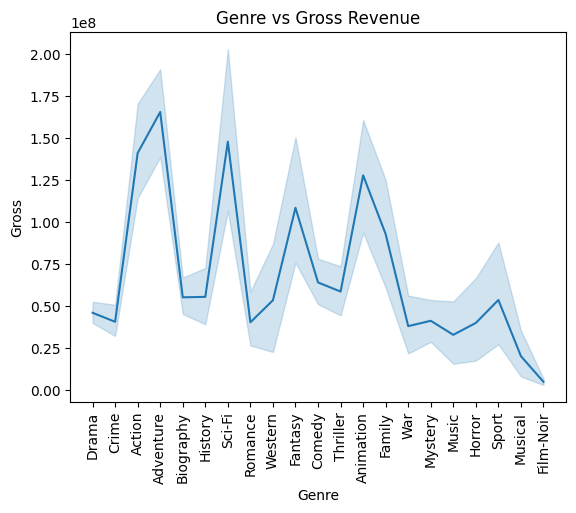

In [194]:
sns.lineplot(x='Genre', y='Gross', data=streaming_viewership_data)
plt.title('Genre vs Gross Revenue')
plt.xticks(rotation=90)
plt.show()

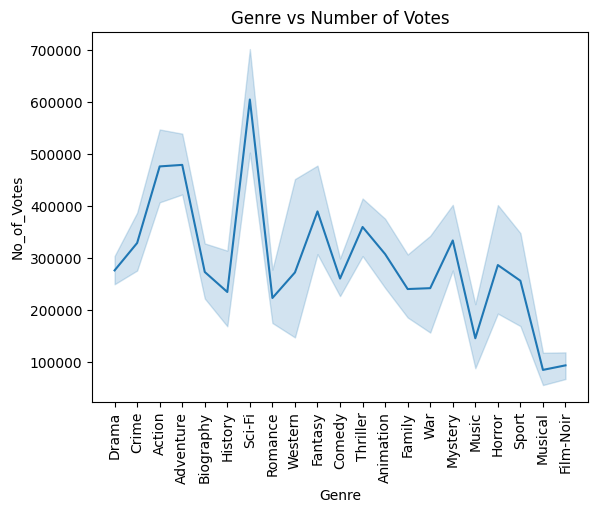

In [195]:
sns.lineplot(x='Genre', y='No_of_Votes', data=streaming_viewership_data)
plt.title('Genre vs Number of Votes')
plt.xticks(rotation=90)
plt.show()

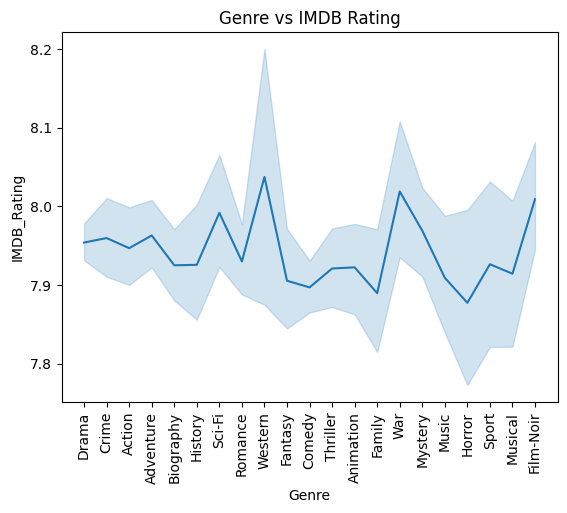

In [200]:
sns.lineplot(x='Genre', y='IMDB_Rating', data=streaming_viewership_data)
plt.title('Genre vs IMDB Rating')
plt.xticks(rotation=90)
plt.show()

## Statisical Analysis

## 1. Genre

In [201]:
model = smf.ols(formula='Q("Gross") ~ Q("Genre")', data=streaming_viewership_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Q("Gross")   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     17.38
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           1.74e-56
Time:                        14:59:58   Log-Likelihood:                -41964.
No. Observations:                2109   AIC:                         8.397e+04
Df Residuals:                    2088   BIC:                         8.409e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.412e+08   8.53e+06     16.567      0.000    1.25e+08    1.58e+08
Q("Genre")[T.Adventure]  2.449e+07   1.18e+07      2.075      0.038    1.34e+06    4.76e+07
Q("Genre")[T.Animation] -1.327e+07   1.56e+07     -0.853      0.394   -4.38e+07    1.72e+07
Q("Genre")[T.Biography] -8.598e+07   1.38e+07     -6.225      0.000   -1.13e+08   -5.89e+07
Q("Genre")[T.Comedy]    -7.711e+07   1.15e+07     -6.711      0.000   -9.96e+07   -5.46e+07
Q("Genre")[T.Crime]     -1.006e+08   1.18e+07     -8.530      0.000   -1.24e+08   -7.74e+07
Q("Genre")[T.Drama]     -9.518e+07   9.57e+06     -9.941      0.000   -1.14e+08   -7.64e+07
Q("Genre")[T.Family]    -4.831e+07   1.76e+07     -2.749      0.006   -8.28e+07   -1.38e+07
Q("Genre")[T.Fantasy]   -3.262e+07   1.66e+07     -1.967      0.049   -6.52e+07   -9.25e+04
Q("Genre")[T.Film-Noir] -1.364e+08   3.32e+07     -4.105      0.000   -2.02e+08   -7.12e+07
Q("Genre")[T.History]    -8.57e+07   1.83e+07     -4.673      0.000   -1.22e+08   -4.97e+07
Q("Genre")[T.Horror]    -1.012e+08   2.42e+07     -4.175      0.000   -1.49e+08   -5.37e+07
Q("Genre")[T.Music]     -1.083e+08   2.04e+07     -5.309      0.000   -1.48e+08   -6.83e+07
Q("Genre")[T.Musical]    -1.21e+08   2.97e+07     -4.074      0.000   -1.79e+08   -6.28e+07
Q("Genre")[T.Mystery]   -9.996e+07   1.44e+07     -6.937      0.000   -1.28e+08   -7.17e+07
Q("Genre")[T.Romance]   -1.009e+08   1.34e+07     -7.548      0.000   -1.27e+08   -7.47e+07
Q("Genre")[T.Sci-Fi]     6.787e+06   1.61e+07      0.422      0.673   -2.47e+07    3.83e+07
Q("Genre")[T.Sport]     -8.757e+07   2.59e+07     -3.384      0.001   -1.38e+08   -3.68e+07
Q("Genre")[T.Thriller]  -8.256e+07   1.33e+07     -6.228      0.000   -1.09e+08   -5.66e+07
Q("Genre")[T.War]       -1.032e+08   1.95e+07     -5.298      0.000   -1.41e+08    -6.5e+07
Q("Genre")[T.Western]   -8.772e+07    2.8e+07     -3.138      0.002   -1.43e+08   -3.29e+07
==============================================================================
Omnibus:                     1276.557   Durbin-Watson:                   0.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15763.022
Skew:                           2.659   Prob(JB):                         0.00
Kurtosis:                      15.292   Cond. No.                         19.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [202]:
table_2 = sm.stats.anova_lm(model, typ=2) # Type 2 ANOVA DataFrame: no interaction effect
table_2

,sum_sq,df,F,PR(>F)
"Q(""Genre"")",3940038590781540352.00,20.00,17.38,0.00
Residual,23674102256269819904.00,2088.00,NaN,NaN


In [203]:
r_squared = model.rsquared
print('1. Coefficient of determination:', r_squared)

p_value = model.f_pvalue
print('2. Whether the regression is statistically significant: ',p_value)

1. Coefficient of determination: 0.1426819183911806
2. Whether the regression is statistically significant:  1.7365581693851992e-56


## 2. IMDB_Rating

In [204]:
model_2 = smf.ols(formula='Q("IMDB_Rating") ~ Q("Genre")', data=streaming_viewership_data).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Q("IMDB_Rating")   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.100
Date:                Tue, 28 Nov 2023   Prob (F-statistic):              0.342
Time:                        15:00:03   Log-Likelihood:                -289.84
No. Observations:                2109   AIC:                             621.7
Df Residuals:                    2088   BIC:                             740.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   7.9468      0.022    355.741      0.000       7.903       7.991
Q("Genre")[T.Adventure]     0.0161      0.031      0.522      0.602      -0.045       0.077
Q("Genre")[T.Animation]    -0.0244      0.041     -0.599      0.549      -0.104       0.056
Q("Genre")[T.Biography]    -0.0218      0.036     -0.602      0.547      -0.093       0.049
Q("Genre")[T.Comedy]       -0.0499      0.030     -1.658      0.097      -0.109       0.009
Q("Genre")[T.Crime]         0.0129      0.031      0.416      0.677      -0.048       0.073
Q("Genre")[T.Drama]         0.0071      0.025      0.285      0.776      -0.042       0.056
Q("Genre")[T.Family]       -0.0572      0.046     -1.242      0.214      -0.148       0.033
Q("Genre")[T.Fantasy]      -0.0414      0.043     -0.953      0.341      -0.127       0.044
Q("Genre")[T.Film-Noir]     0.0623      0.087      0.716      0.474      -0.108       0.233
Q("Genre")[T.History]      -0.0212      0.048     -0.441      0.659      -0.115       0.073
Q("Genre")[T.Horror]       -0.0695      0.064     -1.094      0.274      -0.194       0.055
Q("Genre")[T.Music]        -0.0377      0.053     -0.705      0.481      -0.143       0.067
Q("Genre")[T.Musical]      -0.0325      0.078     -0.418      0.676      -0.185       0.120
Q("Genre")[T.Mystery]       0.0223      0.038      0.589      0.556      -0.052       0.096
Q("Genre")[T.Romance]      -0.0169      0.035     -0.482      0.630      -0.086       0.052
Q("Genre")[T.Sci-Fi]        0.0450      0.042      1.068      0.286      -0.038       0.128
Q("Genre")[T.Sport]        -0.0205      0.068     -0.302      0.763      -0.153       0.112
Q("Genre")[T.Thriller]     -0.0259      0.035     -0.745      0.456      -0.094       0.042
Q("Genre")[T.War]           0.0721      0.051      1.414      0.158      -0.028       0.172
Q("Genre")[T.Western]       0.0907      0.073      1.238      0.216      -0.053       0.234
==============================================================================
Omnibus:                      307.672   Durbin-Watson:                   0.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              480.032
Skew:                           1.006   Prob(JB):                    5.79e-105
Kurtosis:                       4.191   Cond. No.                         19.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [205]:
table_2 = sm.stats.anova_lm(model_2, typ=2) # Type 2 ANOVA DataFrame: no interaction effect
table_2

,sum_sq,df,F,PR(>F)
"Q(""Genre"")",1.71,20.00,1.10,0.34
Residual,162.54,2088.00,NaN,NaN


In [206]:
r_squared = model_2.rsquared
print('1. Coefficient of determination:', r_squared)

p_value = model_2.f_pvalue
print('2. Whether the regression is statistically significant: ',p_value)

1. Coefficient of determination: 0.01042370037183371
2. Whether the regression is statistically significant:  0.3419744859331738


## 3. No_of_Votes

In [207]:
model_3 = smf.ols(formula='Q("Gross") ~ Q("Genre")', data=streaming_viewership_data).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Q("Gross")   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     17.38
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           1.74e-56
Time:                        15:00:35   Log-Likelihood:                -41964.
No. Observations:                2109   AIC:                         8.397e+04
Df Residuals:                    2088   BIC:                         8.409e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.412e+08   8.53e+06     16.567      0.000    1.25e+08    1.58e+08
Q("Genre")[T.Adventure]  2.449e+07   1.18e+07      2.075      0.038    1.34e+06    4.76e+07
Q("Genre")[T.Animation] -1.327e+07   1.56e+07     -0.853      0.394   -4.38e+07    1.72e+07
Q("Genre")[T.Biography] -8.598e+07   1.38e+07     -6.225      0.000   -1.13e+08   -5.89e+07
Q("Genre")[T.Comedy]    -7.711e+07   1.15e+07     -6.711      0.000   -9.96e+07   -5.46e+07
Q("Genre")[T.Crime]     -1.006e+08   1.18e+07     -8.530      0.000   -1.24e+08   -7.74e+07
Q("Genre")[T.Drama]     -9.518e+07   9.57e+06     -9.941      0.000   -1.14e+08   -7.64e+07
Q("Genre")[T.Family]    -4.831e+07   1.76e+07     -2.749      0.006   -8.28e+07   -1.38e+07
Q("Genre")[T.Fantasy]   -3.262e+07   1.66e+07     -1.967      0.049   -6.52e+07   -9.25e+04
Q("Genre")[T.Film-Noir] -1.364e+08   3.32e+07     -4.105      0.000   -2.02e+08   -7.12e+07
Q("Genre")[T.History]    -8.57e+07   1.83e+07     -4.673      0.000   -1.22e+08   -4.97e+07
Q("Genre")[T.Horror]    -1.012e+08   2.42e+07     -4.175      0.000   -1.49e+08   -5.37e+07
Q("Genre")[T.Music]     -1.083e+08   2.04e+07     -5.309      0.000   -1.48e+08   -6.83e+07
Q("Genre")[T.Musical]    -1.21e+08   2.97e+07     -4.074      0.000   -1.79e+08   -6.28e+07
Q("Genre")[T.Mystery]   -9.996e+07   1.44e+07     -6.937      0.000   -1.28e+08   -7.17e+07
Q("Genre")[T.Romance]   -1.009e+08   1.34e+07     -7.548      0.000   -1.27e+08   -7.47e+07
Q("Genre")[T.Sci-Fi]     6.787e+06   1.61e+07      0.422      0.673   -2.47e+07    3.83e+07
Q("Genre")[T.Sport]     -8.757e+07   2.59e+07     -3.384      0.001   -1.38e+08   -3.68e+07
Q("Genre")[T.Thriller]  -8.256e+07   1.33e+07     -6.228      0.000   -1.09e+08   -5.66e+07
Q("Genre")[T.War]       -1.032e+08   1.95e+07     -5.298      0.000   -1.41e+08    -6.5e+07
Q("Genre")[T.Western]   -8.772e+07    2.8e+07     -3.138      0.002   -1.43e+08   -3.29e+07
==============================================================================
Omnibus:                     1276.557   Durbin-Watson:                   0.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15763.022
Skew:                           2.659   Prob(JB):                         0.00
Kurtosis:                      15.292   Cond. No.                         19.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [208]:
table_3 = sm.stats.anova_lm(model_3, typ=2) # Type 2 ANOVA DataFrame: no interaction effect
table_3

,sum_sq,df,F,PR(>F)
"Q(""Genre"")",3940038590781540352.00,20.00,17.38,0.00
Residual,23674102256269819904.00,2088.00,NaN,NaN


In [209]:
r_squared = model_3.rsquared
print('1. Coefficient of determination:', r_squared)

p_value = model_3.f_pvalue
print('2. Whether the regression is statistically significant: ',p_value)

1. Coefficient of determination: 0.1426819183911806
2. Whether the regression is statistically significant:  1.7365581693851992e-56
